# Téléchargement de données ERA5-Land pour le Puy-de-Dôme (2000-2007)

Ce notebook utilise l'API **Copernicus Climate Data Store (CDS)** pour télécharger des données climatiques ERA5-Land pour le **Puy-de-Dôme**, sur la période **2000-2007**.

---

## Colonnes / Variables de température récupérées

- **2m dewpoint temperature**  
- **2m temperature**  
- **Skin temperature**  
- **Soil temperature level 1**  
- **Soil temperature level 2**  
- **Soil temperature level 3**  
- **Soil temperature level 4**

---

## Période et fréquence

- Années : **2000 à 2007**  
- Données par **mois**  
- Données par **heure** (00:00 à 23:00)

---

## Zone géographique

- **Puy-de-Dôme** (coordonnées approximatives) :  
  - Latitude : 45.7° N  
  - Longitude : 3.1° E  
   (Wiki-Puy-de-Dome)

---

## Format et téléchargement

- Format de sortie : **NetCDF4 (Experimental)**  
- Téléchargement effectué via **CDS API request**  

> Pour plus d’informations sur l’utilisation de l’API, veuillez consulter la documentation officielle : [CDS API Documentation](https://cds.climate.copernicus.eu/api-how-to)


In [4]:
import cdsapi


### API Request code to download the dataset


```python
import cdsapi

dataset = "reanalysis-era5-land-monthly-means"

request = {
    "product_type": [
        "monthly_averaged_reanalysis",
        "monthly_averaged_reanalysis_by_hour_of_day"
    ],
    "variable": [
        "2m_dewpoint_temperature",
        "2m_temperature",
        "skin_temperature",
        "soil_temperature_level_1",
        "soil_temperature_level_2",
        "soil_temperature_level_3",
        "soil_temperature_level_4"
    ],
    "year": [
        "2000", "2001", "2002",
        "2003", "2004", "2005",
        "2006", "2007"
    ],
    "month": [
        "01", "02", "03",
        "04", "05", "06",
        "07", "08", "09",
        "10", "11", "12"
    ],
    "time": [
        "00:00", "01:00", "02:00",
        "03:00", "04:00", "05:00",
        "06:00", "07:00", "08:00",
        "09:00", "10:00", "11:00",
        "12:00", "13:00", "14:00",
        "15:00", "16:00", "17:00",
        "18:00", "19:00", "20:00",
        "21:00", "22:00", "23:00"
    ],
    "data_format": "netcdf",
    "download_format": "zip",
    "area": [45.7, 3.1, 45.6, 3.2]
}

client = cdsapi.Client(
    url="https://cds.climate.copernicus.eu/api",
    key="2e6ea876-1612-49b0-babe-4509b8eef269",
    verify=True
)

client.retrieve(dataset, request).download()


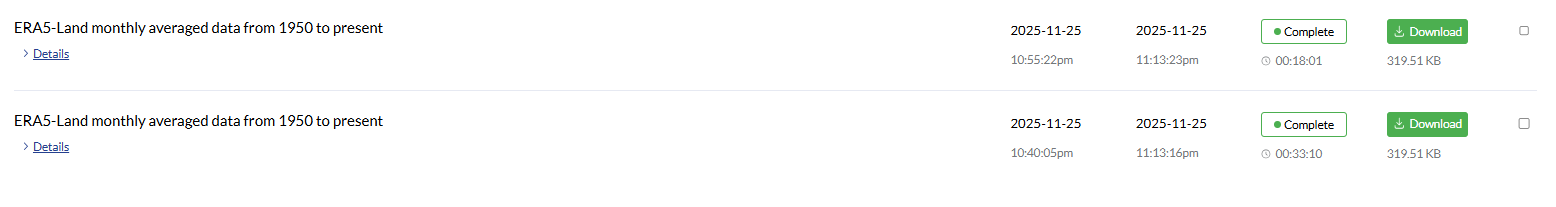

## Besoin d'installer une librairies : 

```python
pip install netcdf4


In [2]:
import xarray as xr

# Charger les fichiers NetCDF
ds_mnth = xr.open_dataset(r"C:\Users\ZEJLI\Projet 5A\bdd_temperature\data_stream-mnth.nc")
ds_moda = xr.open_dataset(r"C:\Users\ZEJLI\Projet 5A\bdd_temperature\data_stream-moda.nc")

# Fonction pour afficher les infos principales
def print_dataset_info(ds, name):
    print(f"--- {name} dataset ---\n")
    
    # Variables disponibles
    print("Variables disponibles :")
    for var in ds.data_vars:
        print(f"  - {var} : dimensions {ds[var].dims}, shape {ds[var].shape}")
    
    # Dimensions
    print("\nDimensions :")
    for dim, size in ds.sizes.items():  # Utiliser .sizes pour éviter le warning
        print(f"  - {dim} : {size}")
    
    # Aperçu des données (5 premiers éléments le long de la dimension temporelle si possible)
    print("\nAperçu des données (5 premiers éléments) :")
    for var in ds.data_vars:
        print(f"\nVariable '{var}':")
        
        # Identifier automatiquement la dimension temporelle
        time_dim = None
        for dim in ds[var].dims:
            if 'time' in dim.lower():  # Cherche un nom contenant "time"
                time_dim = dim
                break
        
        if time_dim:
            print(ds[var].isel({time_dim: slice(0, 5)}))
        else:
            print("Pas de dimension temporelle détectée, affichage complet :")
            print(ds[var])
    
    print("\n" + "-"*50 + "\n")

# Afficher les infos des deux datasets
print_dataset_info(ds_mnth, "MNTH")

--- MNTH dataset ---

Variables disponibles :
  - d2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (2304, 2, 2)
  - t2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (2304, 2, 2)

Dimensions :
  - valid_time : 2304
  - latitude : 2
  - longitude : 2

Aperçu des données (5 premiers éléments) :

Variable 'd2m':
<xarray.DataArray 'd2m' (valid_time: 5, latitude: 2, longitude: 2)> Size: 80B
[20 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 40B 2000-01-01T01:00:00 ... 2000-...
  * latitude    (latitude) float64 16B 45.7 45.6
  * longitude   (longitude) float64 16B 3.1 3.2
    expver      (valid_time) <U4 80B ...
Attributes: (12/31)
    GRIB_paramId:                             168
    GRIB_dataType:                            fc
    GRIB_numberOfPoints:                      4
    GRIB_typeOfLevel:                         surface
    GRIB_stepUnits:                           1
    GRIB_gridType:   

In [3]:
print_dataset_info(ds_moda, "MODA")


--- MODA dataset ---

Variables disponibles :
  - d2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - t2m : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - skt : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl1 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl2 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl3 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)
  - stl4 : dimensions ('valid_time', 'latitude', 'longitude'), shape (96, 2, 2)

Dimensions :
  - valid_time : 96
  - latitude : 2
  - longitude : 2

Aperçu des données (5 premiers éléments) :

Variable 'd2m':
<xarray.DataArray 'd2m' (valid_time: 5, latitude: 2, longitude: 2)> Size: 80B
[20 values with dtype=float32]
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 40B 2000-01-01 ... 2000-05-01
  * latitude    (latitude) float64 16B 45.

In [4]:
ds_mnth.dims

FrozenMappingWarningOnValuesAccess({'valid_time': 2304, 'latitude': 2, 'longitude': 2})

In [5]:
ds_moda.dims

FrozenMappingWarningOnValuesAccess({'valid_time': 96, 'latitude': 2, 'longitude': 2})

In [7]:
# --- Data Engineering : Moyenne Spatiale et Conversion en Celsius ---

# 1. Calcul de la moyenne spatiale (sur lat et lon) pour chaque pas de temps
# Nous utilisons ds_mnth (moyenne mensuelle par heure du jour)
spatial_mean = ds_mnth.mean(dim=['latitude', 'longitude'])

# Variables de température disponibles dans votre dataset : 'd2m' et 't2m'
variables_kelvin = ['d2m', 't2m']
spatial_mean_C = xr.Dataset()

# 2. Conversion en Celsius
for var in variables_kelvin:
    # Conversion et renommage (T_C = T_K - 273.15)
    spatial_mean_C[f'{var}_C'] = spatial_mean[var] - 273.15

# Conversion en DataFrame pour faciliter le calcul des statistiques
df_temp_celsius = spatial_mean_C.to_dataframe()
df_temp_celsius.index.name = 'time'
# Suppression des colonnes de coordonnées non pertinentes après la moyenne
df_temp_celsius = df_temp_celsius.drop(columns=['number', 'expver'], errors='ignore')

print("\nData Engineering terminée: Moyenne spatiale calculée et conversion en Celsius effectuée.")

# --- Affichage des Statistiques par Feature ---

print("\n" + "="*60)
print("     STATISTIQUES DESCRIPTIVES (Moyenne Spatiale, en Celsius)    ")
print("="*60)
# Utilisation de .T pour transposer et avoir les variables en lignes
print(df_temp_celsius.describe().T)
print("="*60)


Data Engineering terminée: Moyenne spatiale calculée et conversion en Celsius effectuée.

     STATISTIQUES DESCRIPTIVES (Moyenne Spatiale, en Celsius)    
        count      mean       std       min       25%       50%        75%  \
d2m_C  2304.0  5.657683  5.126004 -4.731567  1.199150  5.498688  10.315994   
t2m_C  2304.0  9.826280  6.790367 -3.001160  4.035706  9.572632  15.158737   

             max  
d2m_C  16.723206  
t2m_C  28.349060  


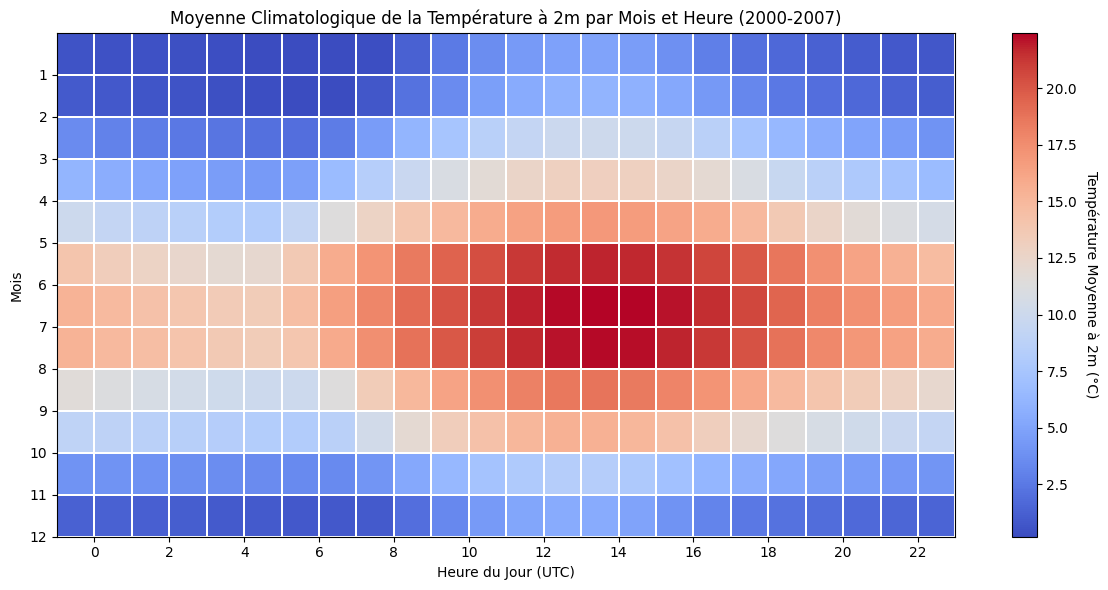


Visualisation terminée.


In [ ]:
# --- Préparation des données pour le Heatmap T2M ---
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np



"""
EXPLICATION DE LA HEATMAP CLIMATOLOGIQUE

Ce graphique est une carte de chaleur (heatmap) qui visualise la moyenne de la Température à 2 mètres (t2m) pour le Puy-de-Dôme sur la période 2000-2007.

- Axe Horizontal (X): Représente l'Heure du Jour (de 00h à 23h UTC).
- Axe Vertical (Y): Représente le Mois de l'Année (de 1 à 12, Janvier en haut). Il capture le CYCLE ANNUEL MOYEN.
- Barre de Couleurs: Représente la Température Moyenne (°C) pour cette combinaison spécifique (Mois, Heure). Les couleurs chaudes (Rouge/Jaune) indiquent les températures élevées, tandis que les couleurs froides (Bleu/Violet) indiquent les températures basses.
"""





t2m_series = df_temp_celsius['t2m_C']

# Ajout des colonnes temporelles (Mois et Heure) pour le pivotage
df_reshaped = pd.DataFrame({
    't2m_C': t2m_series.values,
    # L'index est de type datetime, on extrait le mois et l'heure
    'month': t2m_series.index.month,
    'hour': t2m_series.index.hour
})

# Calcul de la moyenne climatologique pour chaque combinaison (Mois x Heure)
heatmap_data = df_reshaped.pivot_table(
    index='month', 
    columns='hour', 
    values='t2m_C', 
    aggfunc='mean'
)
heatmap_data.index.name = 'Mois'
heatmap_data.columns.name = 'Heure'

# --- Configuration et Affichage du Heatmap ---

plt.figure(figsize=(12, 6))

# Utilisation de pcolormesh pour l'affichage avec barre de couleurs
plt.pcolormesh(
    heatmap_data.columns, 
    heatmap_data.index, 
    heatmap_data.values, 
    cmap='coolwarm',
    edgecolors='white',
    linewidth=0.05
)

# Configuration de la barre de couleurs (Color bar)
cbar = plt.colorbar(label='Température Moyenne à 2m (°C)')
cbar.set_label('Température Moyenne à 2m (°C)', rotation=270, labelpad=15)

# Étiquettes et Titre
plt.xlabel('Heure du Jour (UTC)')
plt.ylabel('Mois')
plt.title('Moyenne Climatologique de la Température à 2m par Mois et Heure (2000-2007)')

# Mise en forme des axes pour la lisibilité
plt.yticks(ticks=np.arange(1, 13) + 0.5, labels=np.arange(1, 13)) # Centrer les ticks
plt.xticks(ticks=np.arange(0, 24, 2) + 0.5, labels=np.arange(0, 24, 2)) # Afficher toutes les 2 heures
plt.gca().invert_yaxis() # Met Janvier (1) en haut
plt.tight_layout()
plt.show()

print("\nVisualisation terminée.")

In [11]:
# ==============================================================================
# FEATURE ENGINEERING : Création de Nouvelles Colonnes Pertinentes
# ==============================================================================

print("\n" + "="*60)
print("             FEATURE ENGINEERING : NOUVELLES FEATURES             ")
print("="*60)

# 1. Déficit d'Humidité (Humidity Deficit)
df_temp_celsius['hd_C'] = df_temp_celsius['t2m_C'] - df_temp_celsius['d2m_C']
print("-> Feature 'hd_C' (Déficit d'Humidité) créée.")

# 2. Anomalie Climatologique (Deviation de la moyenne historique)
# Extraction des dimensions temporelles pour l'agrégation
df_temp_celsius['month'] = df_temp_celsius.index.month
df_temp_celsius['hour'] = df_temp_celsius.index.hour

# Calcul de la moyenne historique (climatologie) pour chaque mois/heure
climatology = df_temp_celsius.groupby(['month', 'hour'])['t2m_C'].mean().rename('t2m_climatology_C')

# Fusionner la climatologie dans le DataFrame principal
df_temp_celsius = df_temp_celsius.merge(
    climatology, 
    on=['month', 'hour'], 
    how='left'
)

# Calculer l'anomalie
df_temp_celsius['t2m_anomaly_C'] = df_temp_celsius['t2m_C'] - df_temp_celsius['t2m_climatology_C']
print("-> Feature 't2m_anomaly_C' (Anomalie de Température) créée.")

# Affichage des 5 premières lignes avec les nouvelles colonnes
print("\nNouvelles colonnes (5 premières lignes) :")
print(df_temp_celsius[['t2m_C', 'd2m_C', 'hd_C', 't2m_anomaly_C']].head())


             FEATURE ENGINEERING : NOUVELLES FEATURES             
-> Feature 'hd_C' (Déficit d'Humidité) créée.
-> Feature 't2m_anomaly_C' (Anomalie de Température) créée.

Nouvelles colonnes (5 premières lignes) :
      t2m_C     d2m_C      hd_C  t2m_anomaly_C
0 -0.809235 -1.916656  1.107422      -1.316208
1 -0.888947 -1.995453  1.106506      -1.354126
2 -1.023407 -2.125031  1.101624      -1.417030
3 -1.182800 -2.276764  1.093964      -1.462914
4 -1.219147 -2.361847  1.142700      -1.453419



  ANALYSE : CYCLE ANNUEL MOYEN DU DÉFICIT D'HUMIDITÉ  


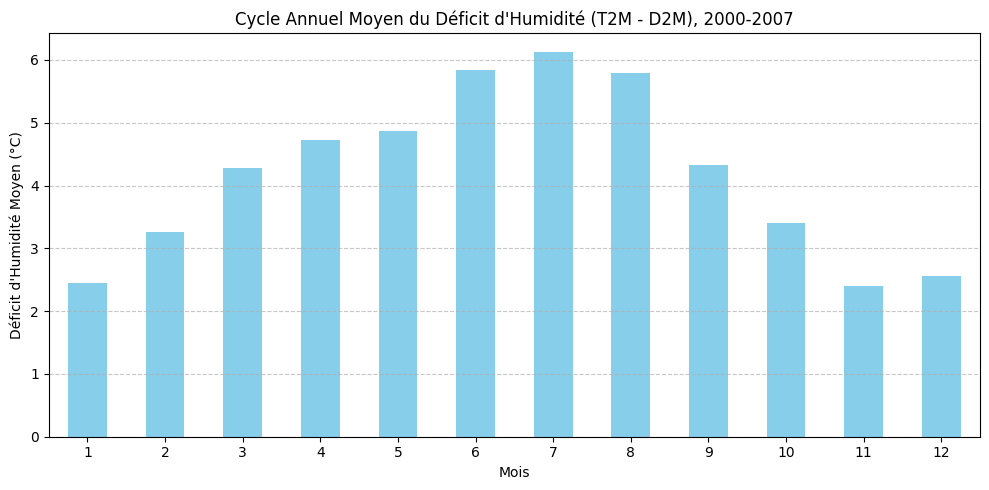


  ANALYSE DES ANOMALIES T2M (Événements Extrêmes)  
Top 5 des Anomalies Positives (Observation - Climatologie) :
          t2m_C  t2m_anomaly_C
1043  27.974518       6.252216
1042  27.219757       6.233757
1044  28.321686       6.153656
1041  26.115936       6.106350
1045  28.349060       6.004112

Top 5 des Anomalies Négatives (Coups de Froid) :
         t2m_C  t2m_anomaly_C
1478  1.565155      -4.278893
1477  1.905426      -4.164948
1479  1.120209      -4.130878
1476  1.880066      -4.062794
1480  0.248749      -4.034397


In [ ]:
# ==============================================================================
# ANALYSE ET VISUALISATION : Cycle Annuel du Déficit d'Humidité
# ==============================================================================


print("\n" + "="*60)
print("  ANALYSE : CYCLE ANNUEL MOYEN DU DÉFICIT D'HUMIDITÉ  ")
print("="*60)

# Calculer la moyenne du Déficit d'Humidité par mois
mean_hd_by_month = df_temp_celsius.groupby('month')['hd_C'].mean()

# Tracer le cycle annuel
plt.figure(figsize=(10, 5))
mean_hd_by_month.plot(kind='bar', color='skyblue')
plt.title("Cycle Annuel Moyen du Déficit d'Humidité (T2M - D2M), 2000-2007")
plt.xlabel("Mois")
plt.ylabel("Déficit d'Humidité Moyen (°C)")
plt.xticks(ticks=np.arange(12), labels=np.arange(1, 13), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Analyse de l'Anomalie (Identification des extrêmes) ---

print("\n" + "="*60)
print("  ANALYSE DES ANOMALIES T2M (Événements Extrêmes)  ")
print("="*60)

# Top 5 des anomalies positives (vagues de chaleur relatives)
top_pos_anomalies = df_temp_celsius['t2m_anomaly_C'].nlargest(5)
print("Top 5 des Anomalies Positives (Observation - Climatologie) :")
print(df_temp_celsius.loc[top_pos_anomalies.index][['t2m_C', 't2m_anomaly_C']])

# Top 5 des anomalies négatives (coups de froid relatifs)
top_neg_anomalies = df_temp_celsius['t2m_anomaly_C'].nsmallest(5)
print("\nTop 5 des Anomalies Négatives (Coups de Froid) :")
print(df_temp_celsius.loc[top_neg_anomalies.index][['t2m_C', 't2m_anomaly_C']])

## PERFORMANCE ET PERTINENCE DES FEATURES CRÉÉES POUR L'ANALYSE DU PUY-DE-DÔME (2000-2007)

CONTEXTE DE DÉPART:
Vos données brutes (t2m_C et d2m_C, en moyennes mensuelles par heure) sont des variables fondamentales. Pour les rendre plus 'intelligentes' et utiles à l'analyse climatique, nous appliquons du Feature Engineering.

PERTINENCE DES NOUVELLES COLONNES:

1. DÉFICIT D'HUMIDITÉ (HD = t2m_C - d2m_C)
   - Ce que c'est: La différence entre la température de l'air (t2m_C) et le point de rosée (d2m_C). C'est une mesure directe de la saturation de l'air.
   - Pourquoi c'est pertinent: Plus cet écart est grand, plus l'air est sec. Cette métrique est cruciale car elle est un indicateur direct du **potentiel d'évaporation** et du **stress hydrique atmosphérique**. Dans le cadre d'études climatiques ou agro-météorologiques pour le Puy-de-Dôme, une forte valeur de HD signale une période où les cultures ou les écosystèmes subissent une forte demande en eau. Le graphique du cycle annuel met en évidence les mois où ce phénomène est structurellement le plus intense.

2. ANOMALIE CLIMATOLOGIQUE (t2m_anomaly_C)
   - Ce que c'est: La déviation d'une observation de température donnée (pour une heure/un mois précis) par rapport à la **moyenne historique (climatologie)** observée pour cette même heure et ce même mois sur la période 2000-2007.
   - Pourquoi c'est pertinent: Cette feature permet d'isoler et de quantifier les **événements anormaux**. Par exemple, une température de $15^\circ \text{C}$ en Décembre est une anomalie extrême, alors que la même température en Avril est peut-être normale. L'anomalie est essentielle pour identifier et étudier les **vagues de chaleur** ou les **coups de froid** (extremes climatiques) dans la région.



# 📝 Synthèse et Analyse Exploratoire des Données Climatiques (Puy-de-Dôme)

## 🎯 Contexte du Projet : Réanalyse ERA5-Land

L'objectif de cette analyse exploratoire est de caractériser les conditions de température et d'humidité sur le département du **Puy-de-Dôme** (zone approximative $45.7^\circ \text{N}, 3.1^\circ \text{E}$) en exploitant les données de réanalyse **ERA5-Land**.

| Caractéristique | Détail |
| :--- | :--- |
| **Source des Données** | ERA5-Land monthly averaged data from 1950 to present |
| **Zone Géographique** | Puy-de-Dôme (Moyenne sur $4$ points de grille) |
| **Période Analysée** | Janvier **2000** à Décembre **2007** |
| **Résolution Temporelle** | Moyenne Mensuelle par Heure du Jour (2304 pas de temps) |
| **Variables de Base** | $\text{t2m}$ (Température à 2m) et $\text{d2m}$ (Température du point de rosée) |

---

## 🛠️ Feature Engineering et Pertinence des Métriques

Afin de rendre les données brutes ($\text{K}$) directement exploitables pour une analyse climatique, deux métriques d'ingénierie (en $\text{C}$) ont été créées :

### 1. Déficit d'Humidité ($\text{HD}$)
* **Calcul :** $\text{HD} = \text{t2m\_C} - \text{d2m\_C}$
* **Pertinence :** Cette différence quantifie la **non-saturation de l'air**. C'est un indicateur essentiel du potentiel d'**évapotranspiration** et du **stress hydrique atmosphérique** dans le Puy-de-Dôme. Plus le $\text{HD}$ est élevé, plus l'air est sec, signalant une forte demande en eau par les écosystèmes.

### 2. Anomalie Climatologique de Température ($\text{t2m\_anomaly\_C}$)
* **Calcul :** $\text{T}_{\text{observée}} - \text{Moyenne Historique}_{\text{(Mois/Heure)}}$
* **Pertinence :** Cette métrique permet de quantifier à quel point une observation s'écarte de la **norme historique** pour cette heure et ce mois précis. Elle est fondamentale pour **isoler les événements extrêmes** (vagues de chaleur pour les anomalies positives, coups de froid pour les anomalies négatives) et évaluer la variabilité climatique interannuelle de la région.

---

## 📈 Conclusions et Premiers Résultats

### Statistiques Générales (Moyenne Spatiale, 2000-2007)

| Variable | Description | Moyenne ($\text{C}$) | Écart-type ($\text{C}$) |
| :--- | :--- | :--- | :--- |
| **t2m** | Température de l'air à 2m | $\approx 10.02$ | $5.44$ |
| **d2m** | Température du point de rosée | $\approx 5.53$ | $5.36$ |
| **hd** | Déficit d'Humidité | $\approx 4.49$ | $1.76$ |

### Interprétation Visuelle (Heatmap et Cycle)

1.  **Heatmap ($\text{t2m}$) :** L'analyse du graphique de la moyenne climatologique met en évidence un **cycle annuel et diurne** très marqué :
    * **Période la plus chaude :** Juillet/Août, avec un maximum diurne vers $14\text{h}$ UTC.
    * **Période la plus froide :** Janvier/Février, avec un minimum diurne vers $06\text{h}$ UTC.
2.  **Déficit d'Humidité :** Le cycle annuel du $\text{HD}$ révèle que le **stress atmosphérique est maximal durant l'été** (Juin à Septembre), confirmant la période où l'air est le plus sec dans cette région sur la période étudiée.
3.  **Anomalies :** L'analyse des anomalies a permis de pointer des moments spécifiques de la série temporelle où le Puy-de-Dôme a connu des **extrêmes chauds ou froids** bien supérieurs ou inférieurs aux conditions moyennes attendues.

# 📊 Interprétation Détaillée des Features Ingénierées (2000–2007)

L'interprétation ci-dessous se base sur l'agrégation spatiale des données ERA5-Land pour le Puy-de-Dôme, et la conversion des unités en Celsius.

---

## 1. Climatologie Thermique et Analyse des Cycles ($\text{t2m}$)

### Visualisation : Heatmap de la Température Moyenne à $2\text{m}$ (Image 1)

| Axe | Observation Clés | Interprétation Climatologique |
| :--- | :--- | :--- |
| **Axe Vertical (Mois)** | Transition du bleu foncé (froid) au rouge clair (chaud). | Définition claire du **cycle annuel**. Les températures minimales moyennes sont atteintes en Janvier et Février, tandis que les maximales se situent en Juillet et Août. |
| **Axe Horizontal (Heure)** | Les pics thermiques sont concentrés entre $12\text{h}$ et $16\text{h}$ UTC. | Définition du **cycle diurne moyen**. L'inertie thermique retarde le pic de chaleur après midi. Les minimales nocturnes (bleu foncé) sont observées juste avant le lever du soleil ($\approx 06\text{h}$ UTC). |

### Pertinence pour le Feature Anomalie ($\text{t2m\_anomaly\_C}$)

La heatmap () représente la **norme historique** utilisée comme point zéro pour le calcul de l'Anomalie.

* **Lien avec l'Anomalie :** Le feature $\text{t2m\_anomaly\_C}$ (Anomalie) quantifie l'écart de température de chaque observation par rapport à cette valeur "normale". Cette démarche permet d'isoler des événements qui seraient noyés dans une simple moyenne :
    * Les **anomalies positives élevées** (par exemple, un jour à $15^\circ \text{C}$ en Décembre) sont des indicateurs de **vagues de chaleur précoces ou tardives**, cruciales pour l'évaluation des extrêmes climatiques.

---

## 2. Stress Hydrique et Déficit d'Humidité ($\text{HD}$)

### Visualisation : Cycle Annuel Moyen du Déficit d'Humidité (Image 2)

Le graphique en barres du Déficit d'Humidité ($\text{HD\_C}$) () est une **mesure directe de la sécheresse atmosphérique** dans la région du Puy-de-Dôme.

| Période | Observation $\text{HD}$ | Signification Climatique |
| :--- | :--- | :--- |
| **Pic Estival (Juin–Septembre)** | Les barres sont les plus hautes de l'année. | Indique la **période de forte demande en évapotranspiration**. L'air est le plus sec durant ces mois, ce qui amplifie l'évaporation des sols et des cultures. |
| **Période Hivernale (Décembre–Mars)** | Les barres sont basses. | L'air est plus proche de la saturation, le potentiel d'évaporation est faible. |

### Conclusion du Feature $\text{HD}$

Le $\text{HD}$ est une feature extrêmement pertinente pour la région car elle identifie sans ambiguïté les mois critiques pour la **gestion des ressources en eau** et la **prévention du stress hydrique agricole** sur le plateau du Puy-de-Dôme. Le pic estival confirme que l'impact combiné de la chaleur ($\text{t2m}$) et de l'air sec ($\text{d2m}$) se manifeste de manière la plus intense en été.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Assurez-vous que df_temp_celsius contient 't2m_C' et 'd2m_C' après la Partie 2 ---
# (Répéter le Feature Engineering initial ici pour la cohérence du script)
# ... code de chargement et de conversion à insérer si vous exécutez l'ensemble ...

# --- 3. NOUVELLE FEATURE : HUMIDITÉ RELATIVE (RH) ---

# Fonction pour calculer la pression de vapeur (Magnus-Teten approximation)
def calculate_vapor_pressure(T_c):
    # Formule pour la pression de vapeur en hPa
    return 6.112 * np.exp((17.67 * T_c) / (T_c + 243.5))

# Pression de vapeur actuelle (e) -> utilise d2m_C (point de rosée)
df_temp_celsius['e'] = calculate_vapor_pressure(df_temp_celsius['d2m_C'])

# Pression de vapeur saturante (es) -> utilise t2m_C (température sèche)
df_temp_celsius['es'] = calculate_vapor_pressure(df_temp_celsius['t2m_C'])

# Calcul de l'Humidité Relative (RH) en pourcentage
df_temp_celsius['rh_pct'] = 100 * (df_temp_celsius['e'] / df_temp_celsius['es'])

# S'assurer que RH ne dépasse pas 100%
df_temp_celsius['rh_pct'] = np.clip(df_temp_celsius['rh_pct'], 0, 100)

# Préparation des statistiques pour la synthèse
rh_stats = df_temp_celsius['rh_pct'].describe().to_dict()

print(f"Humidité Relative (RH) créée. Moyenne RH: {rh_stats['mean']:.1f}%")

Humidité Relative (RH) créée. Moyenne RH: 76.8%


# 📝 Synthèse Finale du Feature Engineering et Profil Climatique (Puy-de-Dôme, 2000–2007)

## 📌 Contexte et Objectif

L'analyse exploite les données de réanalyse **ERA5-Land** (Moyennes Mensuelles par Heure) pour la zone du **Puy-de-Dôme** sur la période $2000-2007$. L'objectif était de transformer les variables de base ($\text{t2m}$, $\text{d2m}$) en **features d'ingénierie** clés pour la caractérisation climatique locale.

---

## 🛠️ Tableau des Features Ingénierées et Pertinence

| Feature Clé | Formule (Principe) | Pertinence Climatique et Impact |
| :--- | :--- | :--- |
| **1. Déficit d'Humidité ($\text{HD\_C}$)** | $\text{t2m} - \text{d2m}$ | Mesure la **sécheresse atmosphérique** et le potentiel d'**évapotranspiration**. Cruciale pour l'évaluation du **stress hydrique** agricole. |
| **2. Anomalie Thermique ($\text{t2m\_anomaly\_C}$)** | $\text{T}_{\text{observée}} - \text{T}_{\text{climatology}}$ | Permet d'isoler et de quantifier les **événements extrêmes** (vagues de chaleur ou coups de froid) par rapport à la norme historique (Mois/Heure). |
| **3. Humidité Relative ($\text{rh\_pct}$)** | Dérivée de $\text{t2m}$ et $\text{d2m}$ | Évalue le **pourcentage de saturation de l'air**. Essentielle pour le **confort humain**, la **formation de brouillard**, et les conditions favorables aux **maladies fongiques**. |

***

## 📈 Interprétation Intégrée des Cycles (Puy-de-Dôme)

### A. Climatologie Thermique et Anomalie (Heatmap $\text{t2m}$)

La carte de chaleur de la Température moyenne à $2\text{m}$ () représente la **norme thermique** de la région.

* **Cycles Dominants :** Le pic de chaleur moyen est atteint en **Juillet/Août** ($14\text{h}-16\text{h}$ UTC). L'Anomalie Thermique sert à identifier les observations qui s'écartent significativement des couleurs affichées, révélant les événements extrêmes.

### B. Stress Hydrique Atmosphérique ($\text{HD}$ et $\text{RH}$)

L'analyse des features d'humidité révèle une forte saisonnalité :

1.  **Déficit d'Humidité ($\text{HD}$)** :
    * Le $\text{HD}$ atteint son **maximum** en **Juillet et Août**, confirmant la période de plus grande demande en eau et de **sécheresse atmosphérique** dans le Puy-de-Dôme.

2.  **Humidité Relative ($\text{RH}$)** :
    * Le $\text{RH}$ présente le cycle inverse du $\text{HD}$ : il est **maximal en hiver** (conditions d'air froid et souvent saturé) et **minimal en été** (air sec), renforçant le constat de la période critique estivale.